# What are Convolutional Neural Networks?

Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.


A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization. 

## Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377b77_dog-1210559-1280/dog-1210559-1280.jpg" width="500" height="500">

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bdb_screen-shot-2016-11-24-at-12.49.08-pm/screen-shot-2016-11-24-at-12.49.08-pm.png" width="250" height="250">
<center>The eye of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bed_screen-shot-2016-11-24-at-12.49.43-pm/screen-shot-2016-11-24-at-12.49.43-pm.png" width="250" height="250">
<center>The nose of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bff_screen-shot-2016-11-24-at-12.50.54-pm/screen-shot-2016-11-24-at-12.50.54-pm.png" width="250" height="250">
<center>The fur of the dog.</center>

### Going One Step Further

But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c52_screen-shot-2016-11-24-at-12.51.47-pm/screen-shot-2016-11-24-at-12.51.47-pm.png">
<center>A curve that we can use to determine a nose</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c68_screen-shot-2016-11-24-at-12.51.51-pm/screen-shot-2016-11-24-at-12.51.51-pm.png">
<center>A nostril that we can use to classify the nose of the dog</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

* Simple shapes, like ovals and dark circles
* Complex objects (combinations of simple shapes), like eyes, nose, and fur
* The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cb19d_heirarchy-diagram/heirarchy-diagram.jpg)
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

## Filters

### Breaking up an Image

The first step for a CNN is to break up the image into smaller pieces. We do this by selecting a width and height that defines a filter.

The filter looks at small pieces, or patches, of the image. These patches are the same size as the filter. 

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377d67_vlcsnap-2016-11-24-15h52m47s438/vlcsnap-2016-11-24-15h52m47s438.png" width=600 height=400>
<center>A CNN uses filters to split an image into smaller patches. The size of these patches matches the filter size.</center>

We then simply slide this filter horizontally or vertically to focus on a different piece of the image.

The amount by which the filter slides is referred to as the **'stride'**. The stride is a hyperparameter which the engineer can tune. Increasing the stride reduces the size of your model by reducing the number of total patches each layer observes. However, this usually comes with a reduction in accuracy.

Let’s look at an example. In this zoomed in image of the dog, we first start with the patch outlined in red. The width and height of our filter define the size of this square.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840fdac_retriever-patch/retriever-patch.png" width=500 height=500>

We then move the square over to the right by a given stride (2 in this case) to get another patch.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840fe04_retriever-patch-shifted/retriever-patch-shifted.png" width=500 height=500>
<center>We move our square to the right by two pixels to create another patch.</center>

What's important here is that we are **grouping together adjacent pixels** and treating them as a collective.

In a normal, non-convolutional neural network, we would have ignored this adjacency. In a normal network, we would have connected every pixel in the input image to a neuron in the next layer. In doing so, we would not have taken advantage of the fact that pixels in an image are close together for a reason and have special meaning.

By taking advantage of this local structure, our CNN learns to classify local patterns, like shapes and objects, in an image.

### Filter Depth

It's common to have more than one filter. Different filters pick up different qualities of a patch. For example, one filter might look for a particular color, while another might look for a kind of object of a specific shape. The amount of filters in a convolutional layer is called the **filter depth**.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377e4f_neilsen-pic/neilsen-pic.png)
<center>In the above example, a patch is connected to a neuron in the next layer. Source: MIchael Neilsen.</center>

How many neurons does each patch connect to?

That’s dependent on our filter depth. If we have a depth of `k`, we connect each patch of pixels to `k` neurons in the next layer. This gives us the height of `k` in the next layer, as shown below. In practice, `k` is a hyperparameter we tune, and most CNNs tend to pick the same starting values.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840ffda_filter-depth/filter-depth.png" width="300" height="500">
<center>Choosing a filter depth of k connects each path to k neurons in the next layer</center>

But why connect a single patch to multiple neurons in the next layer? Isn’t one neuron good enough?

Multiple neurons can be useful because a patch can have multiple interesting characteristics that we want to capture.

For example, one patch might include some white teeth, some blonde whiskers, and part of a red tongue. In that case, we might want a filter depth of at least three - one for each of teeth, whiskers, and tongue.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584104c8_teeth-whiskers-tongue/teeth-whiskers-tongue.png" width="350" height="400">
<center>This patch of the dog has many interesting features we may want to capture. These include the presence of teeth, the presence of whiskers, and the pink color of the tongue.</center>

Having multiple neurons for a given patch ensures that our CNN can learn to capture whatever characteristics the CNN learns are important.

Remember that the CNN isn't "programmed" to look for certain characteristics. Rather, it **learns on its own** which characteristics to notice.

## Parameters

### Parameter Sharing

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377f77_vlcsnap-2016-11-24-16h01m35s262/vlcsnap-2016-11-24-16h01m35s262.png" width=600 height=400>
<center>The weights, w, are shared across patches for a given layer in a CNN to detect the cat above regardless of where in the image it is located.</center>

When we are trying to classify a picture of a cat, we don’t care where in the image a cat is. If it’s in the top left or the bottom right, it’s still a cat in our eyes. We would like our CNNs to also possess this ability known as translation invariance. How can we achieve this?

As we saw earlier, the classification of a given patch in an image is determined by the weights and biases corresponding to that patch.

If we want a cat that’s in the top left patch to be classified in the same way as a cat in the bottom right patch, we need the weights and biases corresponding to those patches to be the same, so that they are classified the same way.

This is exactly what we do in CNNs. The weights and biases we learn for a given output layer are shared across all patches in a given input layer. Note that as we increase the depth of our filter, the number of weights and biases we have to learn still increases, as the weights aren't shared across the output channels.

There’s an additional benefit to sharing our parameters. If we did not reuse the same weights across all patches, we would have to learn new parameters for every single patch and hidden layer neuron pair. This does not scale well, especially for higher fidelity images. Thus, sharing parameters not only helps us with translation invariance, but also gives us a smaller, more scalable model.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4d5_screen-shot-2016-11-24-at-10.05.37-pm/screen-shot-2016-11-24-at-10.05.37-pm.png)
<center>A 5x5 grid with a 3x3 filter. Source: Andrej Karpathy.</center>

Let's say we have a `5x5` grid (as shown above) and a filter of size `3x3` with a stride of `1`. What's the width and height of the next layer? We see that we can fit at most three patches in each direction, giving us a dimension of `3x3` in our next layer. As we can see, the width and height of each subsequent layer decreases in such a scheme.

In an ideal world, we'd be able to maintain the same width and height across layers so that we can continue to add layers without worrying about the dimensionality shrinking and so that we have consistency. How might we achieve this? One way is to simple add a border of `0`s to our original `5x5` image. You can see what this looks like in the below image:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4ee_screen-shot-2016-11-24-at-10.05.46-pm/screen-shot-2016-11-24-at-10.05.46-pm.png)
<center>The same grid with 0 padding. Source: Andrej Karpathy.</center>

This would expand our original image to a `7x7`. With this, we now see how our next layer's size is again a `5x5`, keeping our dimensionality consistent.

### Dimensionality

From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?

Given our input layer has a volume of `W`, our filter has a volume `(height * width * depth)` of `F`, we have a stride of `S`, and a padding of `P`, the following formula gives us the volume of the next layer: `(W−F+2P)/S+1`.

Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network

## Visualizing CNNs

Let’s look at an example CNN to see how it works in action.

The CNN we will look at is trained on ImageNet as described in [this paper](http://www.matthewzeiler.com/pubs/arxive2013/eccv2014.pdf) by Zeiler and Fergus. In the images below (from the same paper), we’ll see what each layer in this network detects and see *how* each layer detects more and more complex ideas.

### Layer 1

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbd42_layer-1-grid/layer-1-grid.png)
<center>Example patterns that cause activations in the first layer of the network. These range from simple diagonal lines (top left) to green blobs (bottom middle).</center>

The images above are from Matthew Zeiler and Rob Fergus' [deep visualization toolbox](https://www.youtube.com/watch?v=ghEmQSxT6tw), which lets us visualize what each layer in a CNN focuses on.

Each image in the above grid represents a pattern that causes the neurons in the first layer to activate - in other words, they are patterns that the first layer recognizes. The top left image shows a -45 degree line, while the middle top square shows a +45 degree line. These squares are shown below again for reference:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbba2_diagonal-line-1/diagonal-line-1.png)
<center>As visualized here, the first layer of the CNN can recognize -45 degree lines.</center>
<br>

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbc02_diagonal-line-2/diagonal-line-2.png)
<center>The first layer of the CNN is also able to recognize +45 degree lines, like the one above.</center>

Let's now see some example images that cause such activations. The below grid of images all activated the -45 degree line. Notice how they are all selected despite the fact that they have different colors, gradients, and patterns.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbace_grid-layer-1/grid-layer-1.png)
<center>Example patches that activate the -45 degree line detector in the first layer.</center>

So, the first layer of our CNN clearly picks out very simple shapes and patterns like lines and blobs.

### Layer 2

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583780f3_screen-shot-2016-11-24-at-12.09.02-pm/screen-shot-2016-11-24-at-12.09.02-pm.png" width=700 height=700>
<center>A visualization of the second layer in the CNN. Notice how we are picking up more complex ideas like circles and stripes. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The second layer of the CNN captures complex ideas.

As you see in the image above, the second layer of the CNN recognizes circles (second row, second column), stripes (first row, second column), and rectangles (bottom right).

**The CNN learns to do this on its own**. There is no special instruction for the CNN to focus on more complex objects in deeper layers. That's just how it normally works out when you feed training data into a CNN.

### Layer 3

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837811f_screen-shot-2016-11-24-at-12.09.24-pm/screen-shot-2016-11-24-at-12.09.24-pm.png" width=700 height=700>
<center>A visualization of the third layer in the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The third layer picks out complex combinations of features from the second layer. These include things like grids, and honeycombs (top left), wheels (second row, second column), and even faces (third row, third column).

### Layer 5

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58378151_screen-shot-2016-11-24-at-12.08.11-pm/screen-shot-2016-11-24-at-12.08.11-pm.png" width=500 height=500>
<center>A visualization of the fifth and final layer of the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

We'll skip layer 4, which continues this progression, and jump right to the fifth and final layer of this CNN.

The last layer picks out the highest order ideas that we care about for classification, like dog faces, bird faces, and bicycles. 

## TensorFlow Convolution Layer

Let's examine how to implement a CNN in TensorFlow.

TensorFlow provides the `tf.nn.conv2d()` and `tf.nn.bias_add()` functions to create your own convolutional layers.

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.7.0


# CNNs will truly OUTPERFORM MLPs.

# Lets Work with RGB Images

#### Here we will train a CNN to classify images from the CIFAR-10 dataset.


### 1. Load CIFAR-10 Database

In [7]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

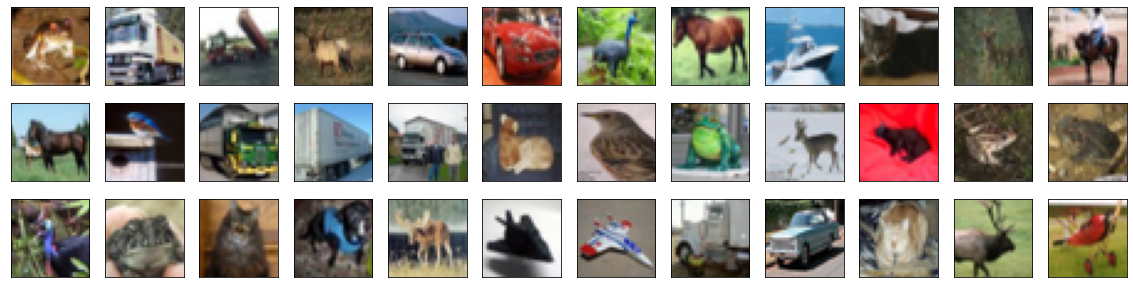

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [10]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

### 6. Compile the Model 

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model 

In [13]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=1,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Epoch 00001: val_loss improved from inf to 1.40555, saving model to model.weights.best.hdf5
1407/1407 - 35s - loss: 1.6137 - accuracy: 0.4148 - val_loss: 1.4056 - val_accuracy: 0.5006 - 35s/epoch - 25ms/step


### 8. Load the Model with the Best Validation Accuracy

In [14]:
model.load_weights('model.weights.best.hdf5')

### 9. Visualize Some Predictions

In [15]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

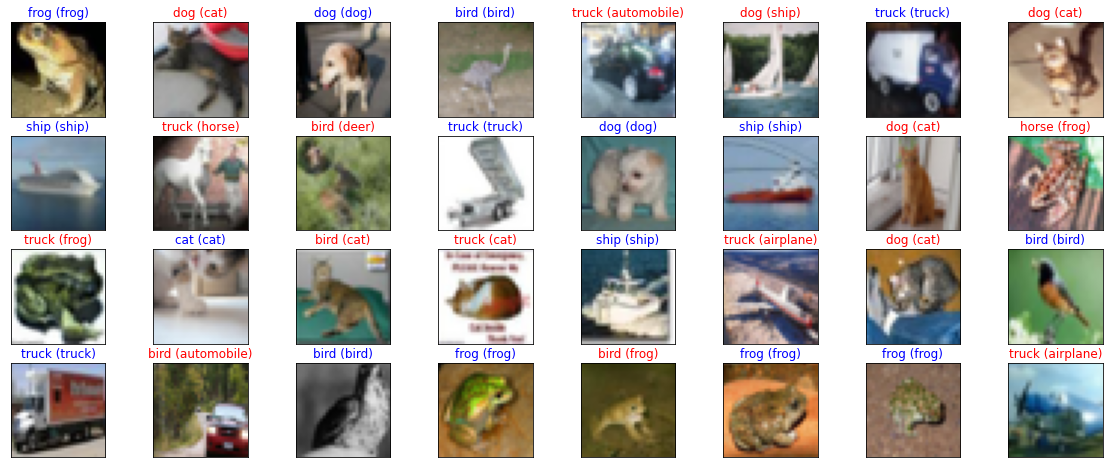

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))